# Objectives :  Your main task is to cluster the countries and then present your solution and recommendations to the CEO through a PPT.

# About Organization :  ABC is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

# Problem Statement :  ABC International have been able to raise around 10 million Dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid.

# Thus, my job as a Data Analyst is to cluster the countries using some socio-economic and health factors that determine the overall development of the country. Then i need to suggest atleast top-5 countries that CEO needs to focus on the most.

In [1]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Step 1. Data Inspection



In [2]:
cd

C:\Users\hp


In [3]:
# Reading the Dataset.

df=pd.read_csv('Country-data.csv')

In [4]:
rows_and_cols=df.shape

In [5]:
rows_and_cols

(167, 10)

In [6]:
print('There are {} rows and {} columns .\n'.format(rows_and_cols[0],rows_and_cols[1]))

There are 167 rows and 10 columns .



In [7]:
# Null value check 

df_information = df.info()
print(df_information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# Understanding the structure of our dataframe.

# Reading the first 5 rows of the dataset.

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [12]:
# Let's read first 5 rows after converting the exports, heath and imports variables.

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
# Summary of each column

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 2. Outlier Analysis

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


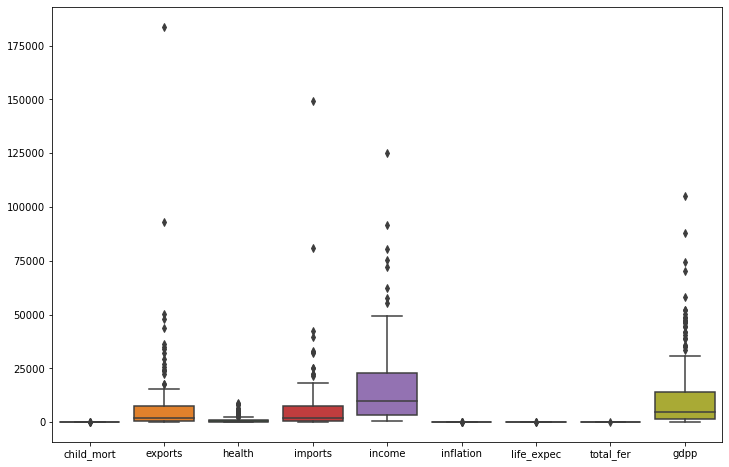

In [15]:
# Now plotting the box plots to check outliers.

fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df)
plt.show()

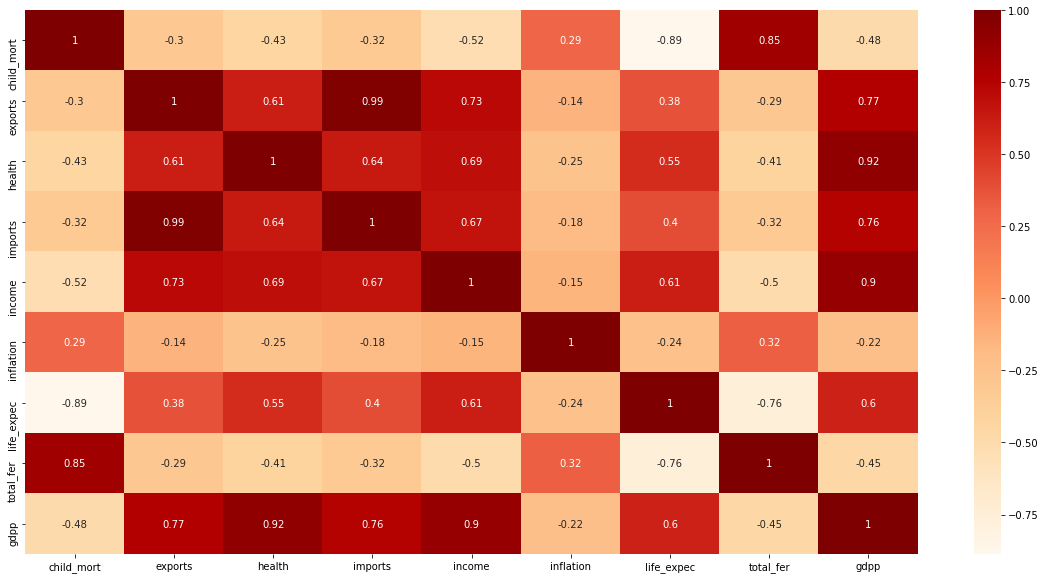

In [16]:
# As we can see there is no missing data(null,NaN values) in the list in output [8],[9],[10]

# Let's plot the heat map to check the multicollinearity of the variables.

#plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True, cmap="OrRd")
plt.show()


# Step 3. Data Preparation

In [17]:
# Applying scaling to the data.

from sklearn.preprocessing import StandardScaler
df1 = df.drop('country',1) 
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df1)

In [18]:
# Performing PCA on the data ( Principal Component Analysis).

pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset.

pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
# List of PCA components

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [20]:
# Now checking the explained variance ratio.

pca.explained_variance_ratio_


array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

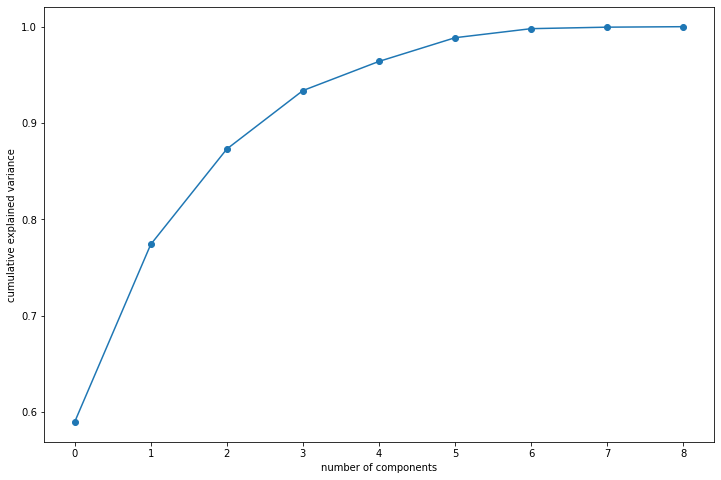

In [21]:
# Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

([<matplotlib.axis.XTick at 0x2a1339c9dc0>,
 <a list of 5 Text major ticklabel objects>)

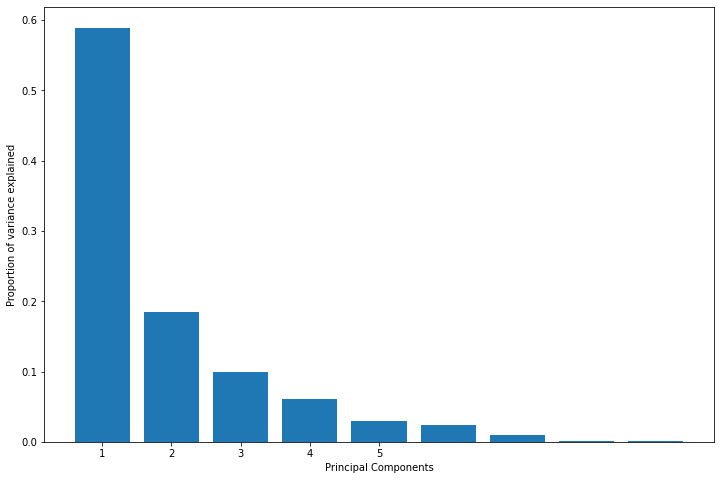

In [22]:
# For better analysis creating a barplot between Principal components & Explained variance ratio.

fig = plt.figure(figsize = (12,8))
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of variance explained')
plt.xticks([1,2,3,4,5])

In [23]:
five_first_com_var_exp = pca.explained_variance_ratio_.cumsum()[4]
print("The cumulative variance of the first five principal components is {}".format(round(five_first_com_var_exp,5)))

The cumulative variance of the first five principal components is 0.96395


In [24]:
colnames = list(df1.columns)
pcs_df = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df



,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


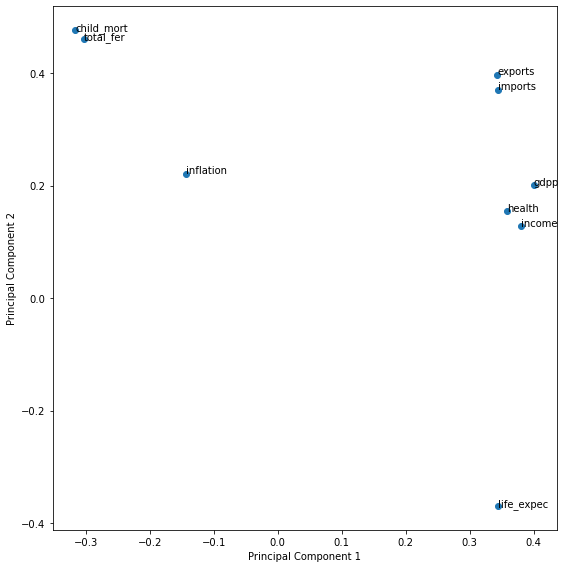

In [25]:
# Plotting principal components.

# We will plot original features on the first two components as axes.

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()



In [26]:
# Performing Incremental PCA

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [27]:
df_pca = pca_final.fit_transform(scaled)
df_pca.shape

(167, 5)

In [28]:
# Now we need to arrange the columns properly.

pc = np.transpose(df_pca)

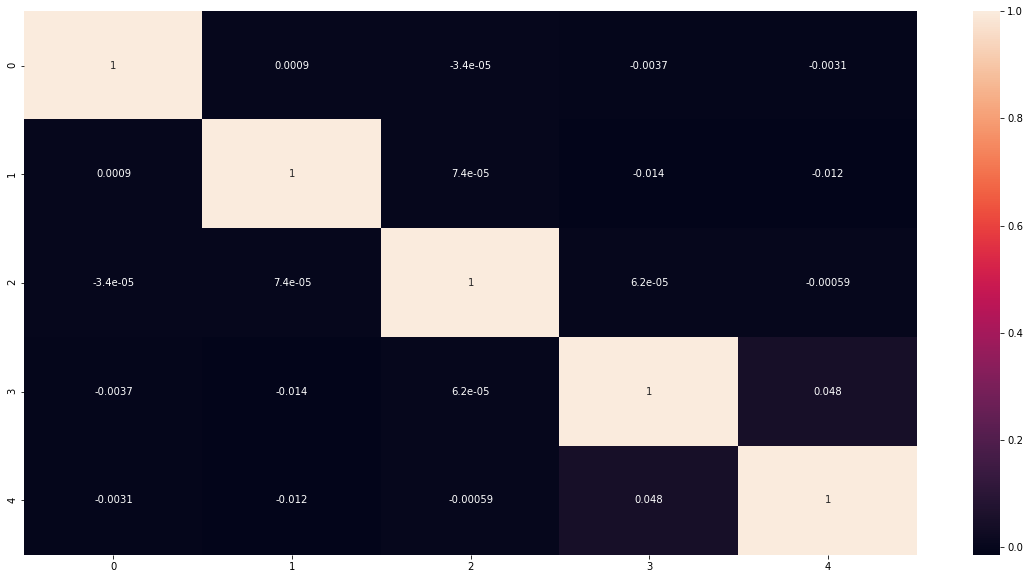

In [29]:
# Creating correlation matrix of Principal Components and plotting them. 

corrmat = np.corrcoef(pc)

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [30]:
# Creating the dataframe of all 5 principal components. 

pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

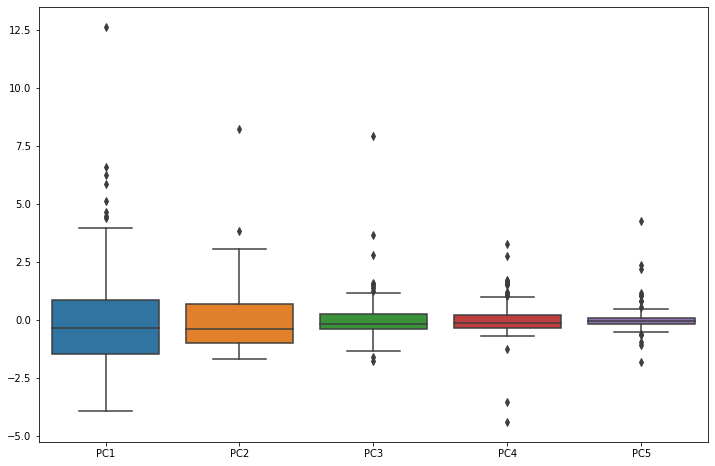

In [31]:
# Now checking outliers of all the principal components.

fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [32]:
# We can observe outliers from the above boxplots. 

pcs_df2.shape

(167, 5)

In [33]:
# Checking the top 5 rows of df2.

pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


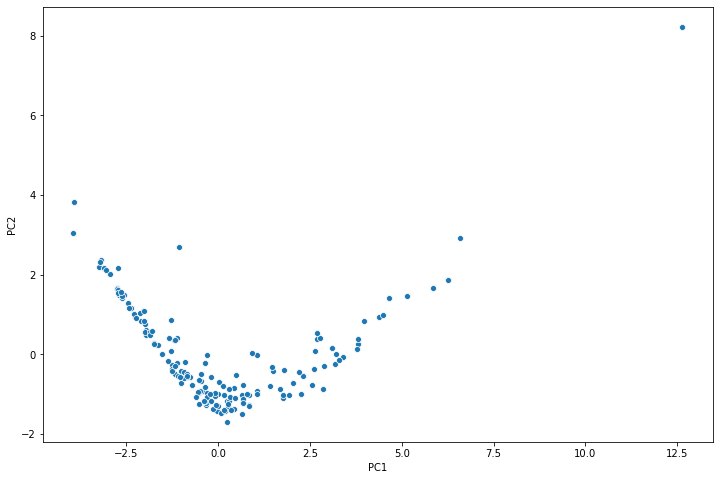

In [34]:
# PCA offers you to visualise the data high dimensionally.

# Creating a Scatter plot of PC1 and PC2.

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

# Step 4. Clustering process 

In [35]:
# Performing Hopkins Statistics to show the tendency of cluster formation. 

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [36]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     167 non-null    float64
 1   PC2     167 non-null    float64
 2   PC3     167 non-null    float64
 3   PC4     167 non-null    float64
 4   PC5     167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [37]:
# Checking hopkins measure

hopkins(pcs_df2)

0.9194742279573065

In [38]:
pcs_df2.shape

(167, 5)

In [39]:
data3_1 = pcs_df2

# Performing k-Means Clustering



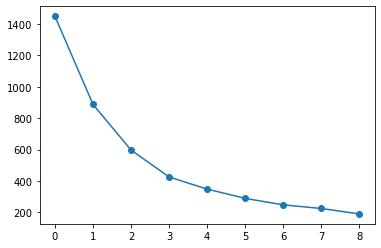

In [40]:
# Performing elbow curve method

ks = []
for num_clusters in list(range(1,10)):
    km = KMeans(n_clusters = num_clusters, max_iter=50)
    km.fit(data3_1)
    ks.append(km.inertia_)

plt.plot(ks, marker = 'o')
plt.show()

In [41]:
# Here we can see a distinct bend at around 3 clusters.

# From the above plot we find that 3 seems to be a good number of clusters for K means algorithm

# Performing K means using K=3

km2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
km2.fit(data3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [42]:
data4=pcs_df2
data4.index = pd.RangeIndex(len(data4.index))
data_km = pd.concat([data4, pd.Series(km2.labels_)], axis=1)
data_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
data_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,0
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,0
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [43]:
data_km['ClusterID'].value_counts()

0    91
2    48
1    28
Name: ClusterID, dtype: int64

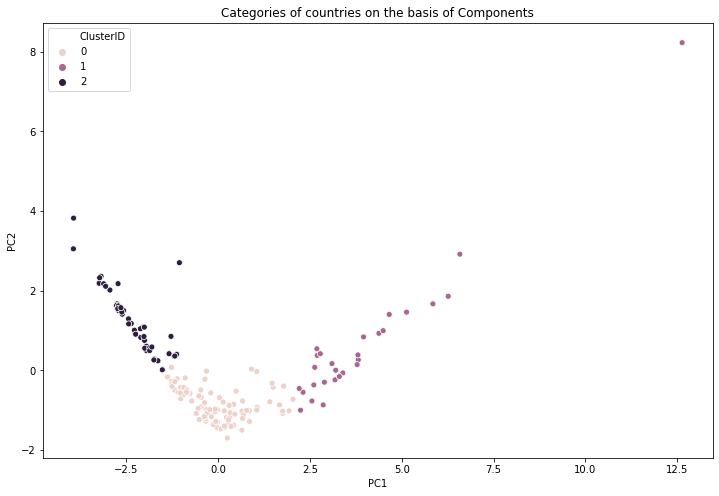

In [44]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [45]:
data5=pd.merge(df,data_km, left_index=True,right_index=True)
data5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [46]:
# Dropping all the principal components from merged dataframe.

data6=data5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
data6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [47]:
data6.shape

(167, 11)

In [48]:
# Cluster Analysis

# Calculating the mean of all the variables of each clusters

Cluster_gdpp        = pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort  = pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports     = pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
Cluster_income      = pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
Cluster_health      = pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
Cluster_imports     = pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
Cluster_inflation   = pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec  = pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer   = pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())

In [49]:
# Concatenating the mean values with the dataframe to find the required mean.

df7 = pd.concat([Cluster_gdpp,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)


In [50]:
# Creating a dataframe of mean of all the variables of all the clusters. 

df7.columns = ["gdpp","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df7


,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
1,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


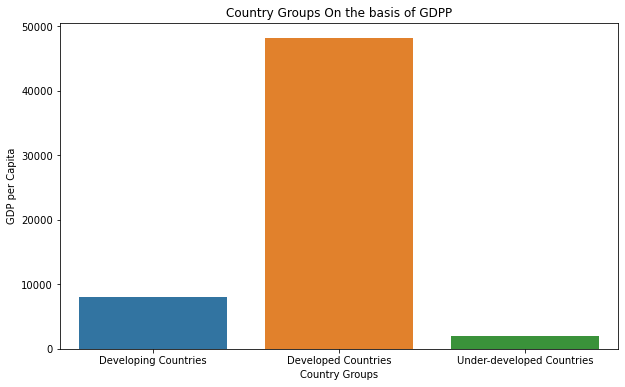

In [51]:
fig = plt.figure(figsize = (10,6))
df7.rename(index={1: 'Developed Countries'},inplace=True)
df7.rename(index={0: 'Developing Countries'},inplace=True)
df7.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df7.index,y='gdpp',data=df7)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

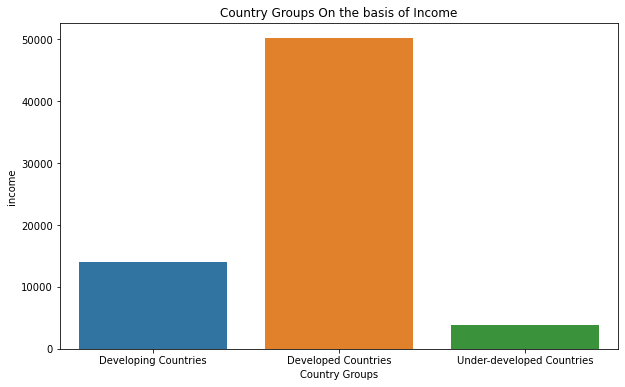

In [52]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df7.index,y='income',data=df7)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()

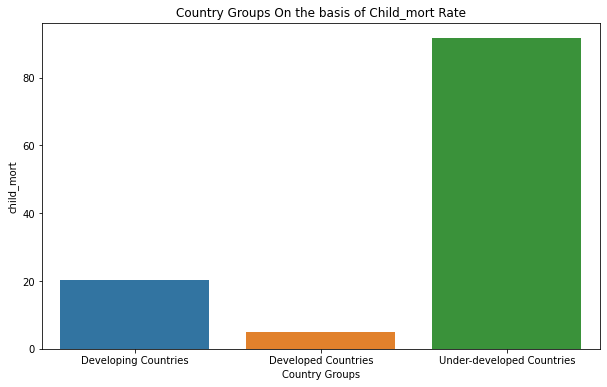

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df7.index,y='child_mort',data=df7)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

In [59]:
# Using concept of binning to find the under-developed countries.

# Binning  is a data pre-processing technique used to reduce the effects of minor observation errors. 

bin1 = df[df['gdpp']<=1909]
bin1 = bin1[bin1['child_mort']>= 92]
bin1 = bin1[bin1['income']<= 3897.35]

In [60]:
# Merging to get the cluster ID.

bin1_k=pd.merge(bin1,data_km,left_index=True,right_index=True)

In [61]:
bin1_k = bin1_k.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [62]:
bin1_k.shape

(17, 11)

In [63]:
# Now finding top low gdpp countries.  

bin1_k_GDPP=bin1_k.nsmallest(8,'gdpp')
bin1_k_GDPP

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2


In [64]:
# Now finding top low income countries.

bin1_k_income=bin1_k.nsmallest(8,'income')
bin1_k_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2


In [65]:
# Now finding top high child mortality rate countries.

bin1_k_mort=bin1_k.nlargest(8,'child_mort')
bin1_k_mort


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2


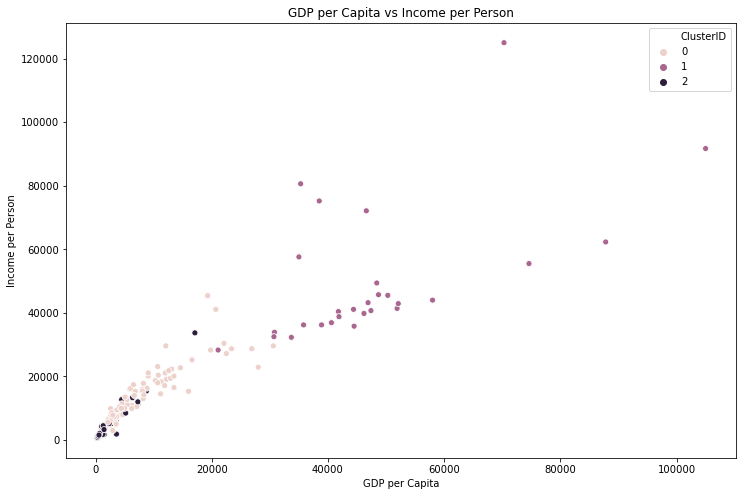

In [66]:
# Plotting a scatter plot between gdpp and income.

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=data6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')
plt.show()

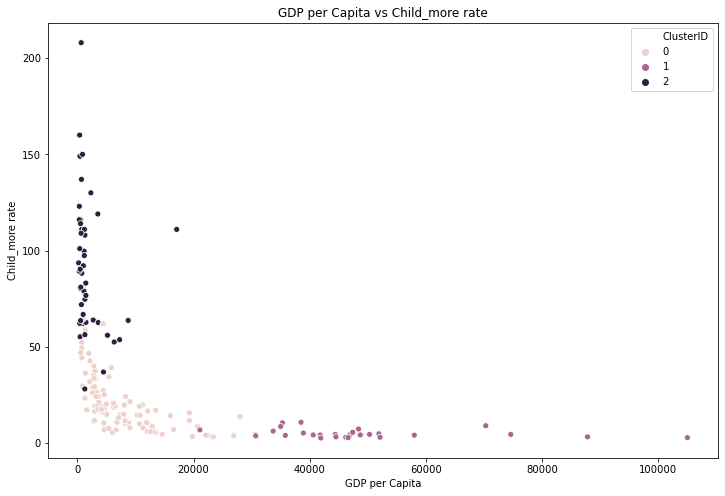

In [67]:
# Plotting a scatter plot between gdpp and child mortality rate.

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=data6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDP per Capita vs Child_more rate')
plt.show()

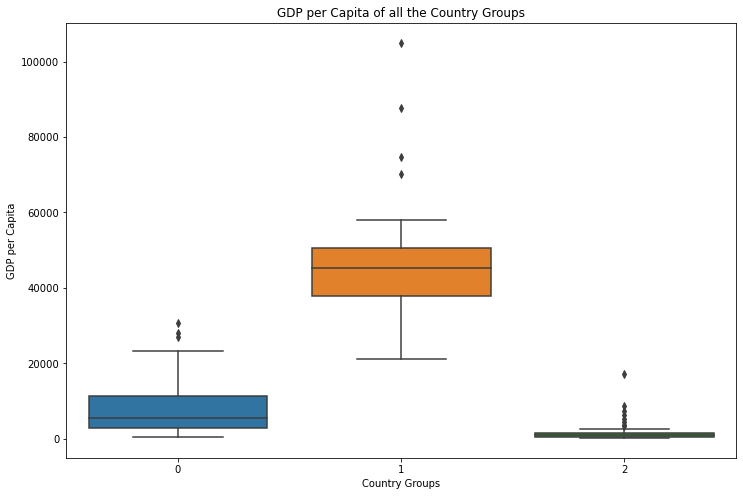

In [68]:
# Plotting boxplots for better analysis.

fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdpp',data=data6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

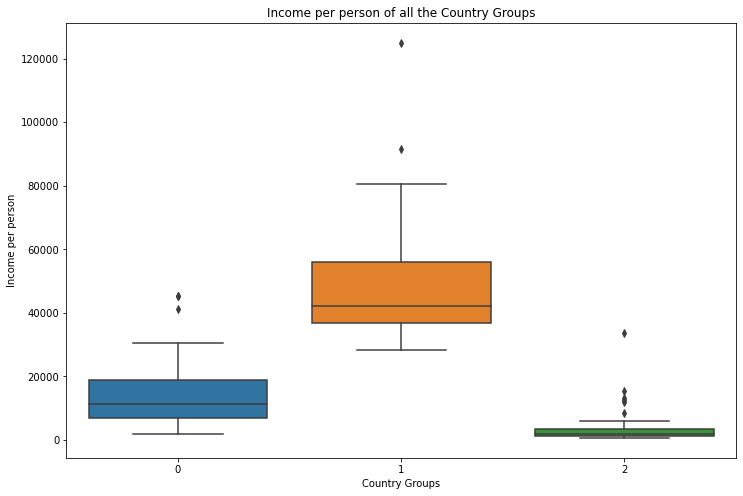

In [69]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='income',data=data6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all the Country Groups')
plt.show()

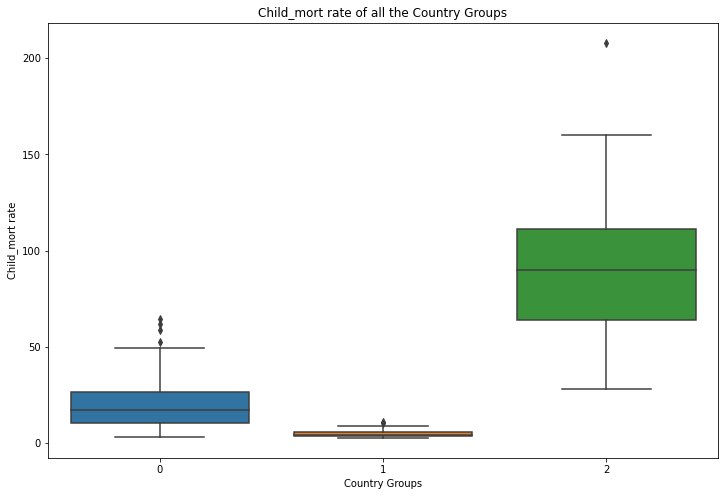

In [70]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='child_mort',data=data6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.title('Child_mort rate of all the Country Groups')
plt.show()

In [71]:
# Putting the clusters in the variables according to the condition of the country.

# In this way, we can plot gdpp, income and child_mort_rate of countries in any cluster.

Developed_country  = data6[data6['ClusterID']==1]
Developing_country = data6[data6['ClusterID']==0]
Poor_country       = data6[data6['ClusterID']==2]

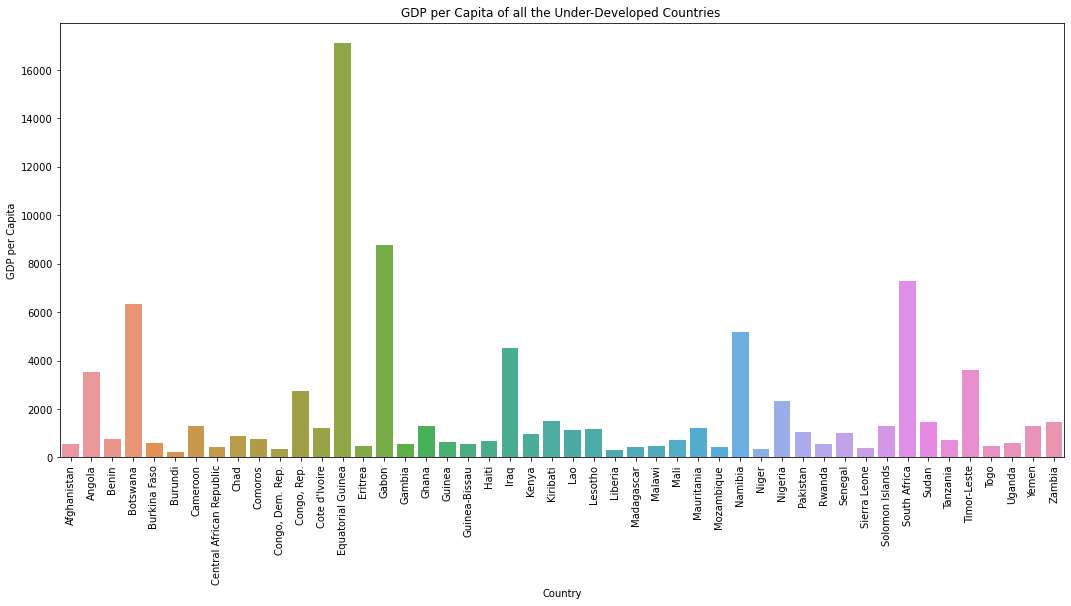

In [72]:
# Now focusing on the under-developed countries as they are in direst need of aid.

# Plotting their bar plots in terms of gdpp, income and child_mort rate.

fig = plt.figure(figsize = (18,8))
s=sns.barplot(x='country',y='gdpp',data=Poor_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Under-Developed Countries ')
plt.show()

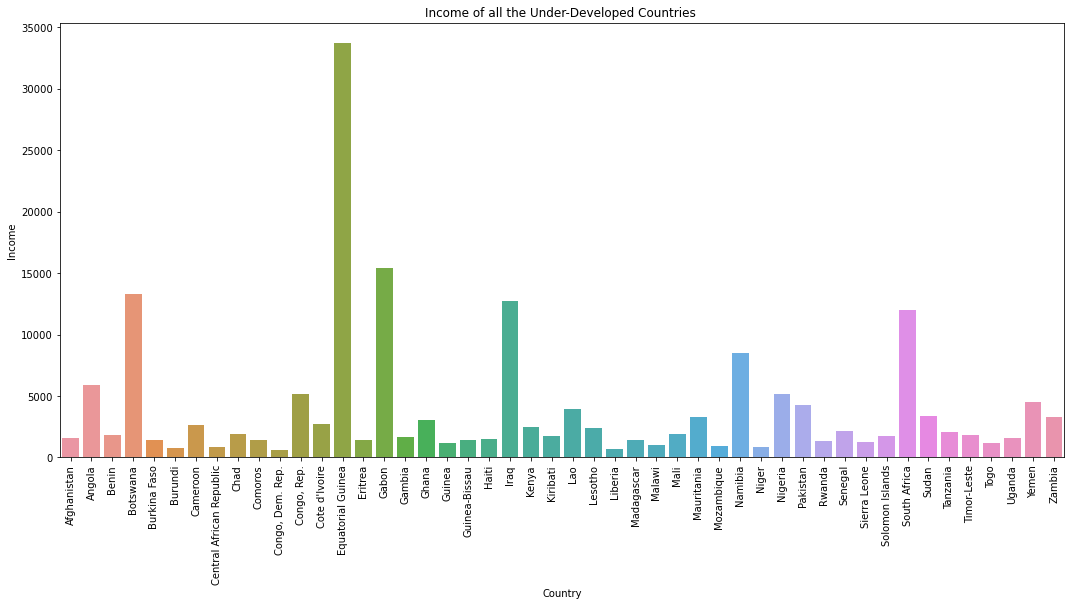

In [73]:
fig = plt.figure(figsize = (18,8))
s=sns.barplot(x='country',y='income',data=Poor_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.title('Income of all the Under-Developed Countries ')
plt.show()

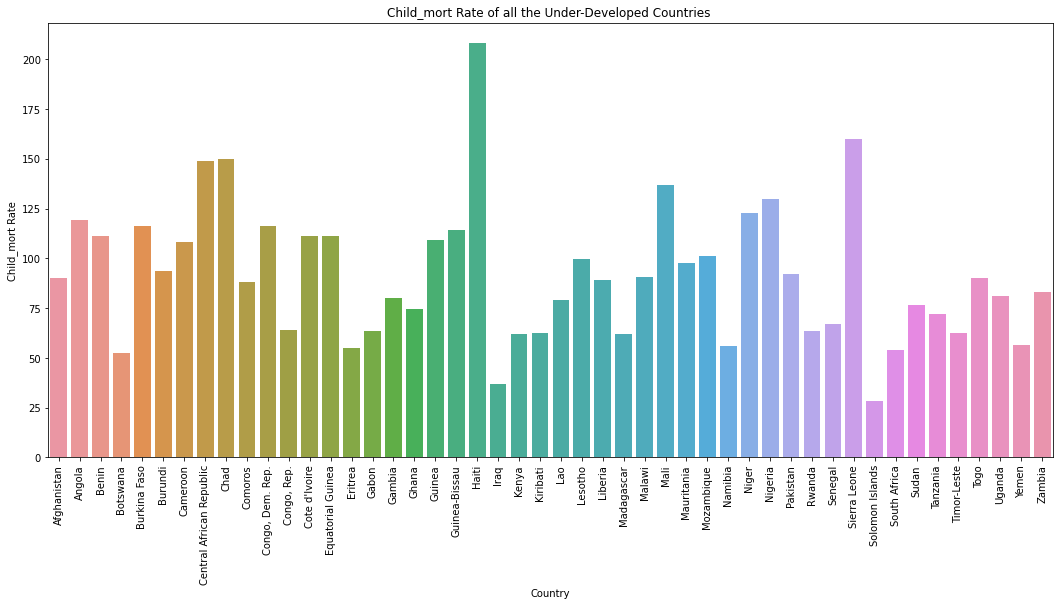

In [74]:
fig = plt.figure(figsize = (18,8))
s=sns.barplot(x='country',y='child_mort',data=Poor_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child_mort Rate', fontsize=10)
plt.title('Child_mort Rate of all the Under-Developed Countries ')
plt.show()

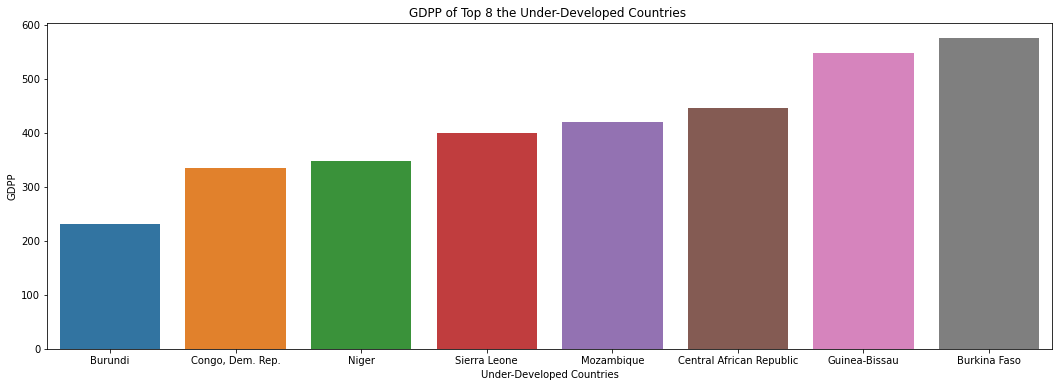

In [75]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='gdpp',data=bin1_k_GDPP)
plt.title('GDPP of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.show()

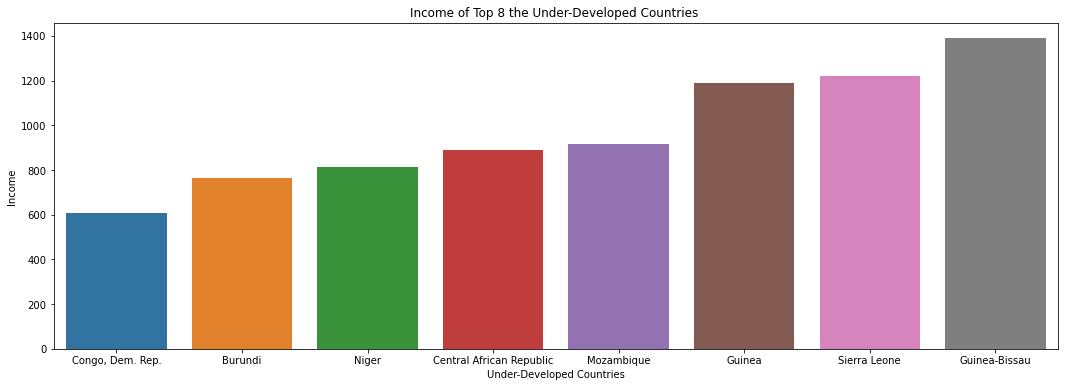

In [76]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='income',data=bin1_k_income)
plt.title('Income of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

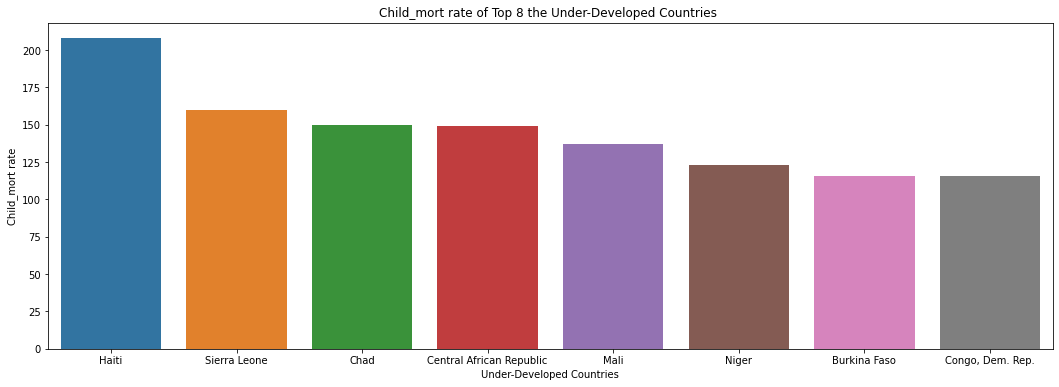

In [77]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='child_mort',data=bin1_k_mort)
plt.title('Child_mort rate of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.show()

#  Performing Hirarchical Clustering

In [78]:
pcs_df2.shape

(167, 5)

In [79]:
pcs_df3 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [80]:
data_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


# Performing Single Linkage

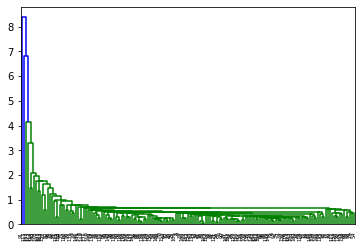

In [81]:
mergings = linkage(pcs_df2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

# Performing Complete Linkage

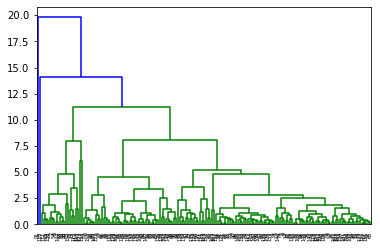

In [82]:
mergings = linkage(pcs_df2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [83]:
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [101]:
# Reshaping the cut_tree result array.

cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
# Assigning cluster labels

data_km['Cluster_lables'] = cluster_labels
data_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [103]:
# Merging data with cluster labels with the given data.

data8 = pd.merge(df,data_km, left_index=True,right_index=True)
data8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [104]:
# Dropping PC 1 to 5.

data9 = data8.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
data9.shape

(167, 12)

In [105]:
data9.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [106]:
# Cluster Analysis. 

Cluster_gdpp_H        = pd.DataFrame(data9.groupby(["Cluster_lables"]).gdpp.mean())
Cluster_child_mort_H  = pd.DataFrame(data9.groupby(["Cluster_lables"]).child_mort.mean())
Cluster_income_H      = pd.DataFrame(data9.groupby(["Cluster_lables"]).income.mean())

In [107]:
# Concatenating clusters.

df_H = pd.concat([Cluster_gdpp_H,Cluster_child_mort_H,Cluster_income_H], axis=1)

In [108]:
# Defining columns. 

df_H.columns = ["gdpp","child_mort","income"]
df_H

,gdpp,child_mort,income
Cluster_lables,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


# Filtering the final under-developed countries that needs more attention.  

In [109]:
# Now using concept of binning to find the final under-developed countries.


bin1_H=df[df['gdpp']<=2330.000000]
bin1_H=bin1[bin1['child_mort']>= 130.000000]
bin1_H=bin1[bin1['income']<= 5150.000000]

In [110]:
bin1_H = pd.merge(bin1_H,data_km,left_index=True,right_index=True)

In [111]:
bin1_H=bin1_H.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
bin1_H.shape

(17, 12)

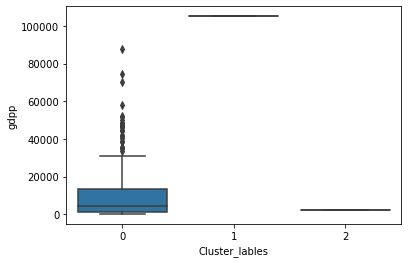

In [112]:
# Now plotting cluster labels in terms of :-
 
# GDPP

sns.boxplot(x='Cluster_lables',y='gdpp',data=data9)
plt.show()

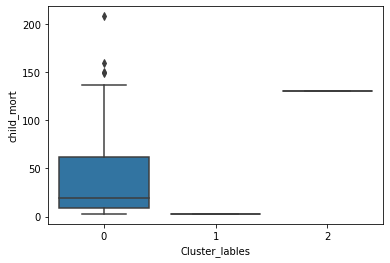

In [113]:
# Child Mortality rate

sns.boxplot(x='Cluster_lables',y='child_mort',data=data9)
plt.show()

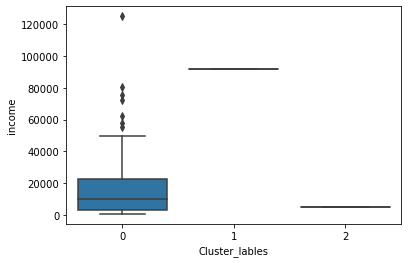

In [114]:
# Income

sns.boxplot(x='Cluster_lables',y='income',data=data9)
plt.show()

In [115]:
# Now getting top 8 under-developed countries in terms of :-

# gdpp

bin1_H.nsmallest(8,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0


In [116]:
# income

bin1_H.nsmallest(8,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0


In [118]:
# child mortality rate

bin1_H.nsmallest(8,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2,0
99,Mauritania,97.4,608.4000,52.9200,734.400,3320,18.900,68.2,4.98,1200,2,0
87,Lesotho,99.7,460.9800,129.8700,1181.700,2380,4.150,46.5,3.30,1170,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2,0
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,2,0


#  After performing clustering, we can see that both K-means and Hierarchical clustering filtered down to similar bottom 8 countries. Since, the K-means clustering gives us better visualisation  through boxplots, barplots and scatter plots. In the K-means plots are clearly visible. Thus, i am considering the outcome of K-means to decide the final list of countries.

# Inferences from the above code

#    Considering GDPP, Income and Child mortality rate the final list of top 8                         under-developed countries which are in direst need of aid are : 


#         Burundi
#         Congo, Dem. Rep.
#         Niger
#         Sierra Leone
#         Haiti
#         Chad
#         Central African Republic
#         Mozambique